In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('baseball.csv')
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [4]:
#checking dimensions of dataset
df.shape

(30, 17)

There are 30 rows and 17 columns including target column.

In [5]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [6]:
#checking information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [7]:
#checkig Data types
df.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

All columns are of int64 datatype except fot ERA which is float datatype. Hence there are no categorical features in the dataset and all the features are continuous

Finding missing values

In [8]:
#checking null values
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

No missing values are foundn in the given dataset

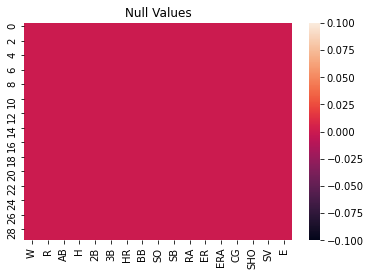

In [9]:
#heatmap for null values
sns.heatmap(df.isnull())
plt.title("Null Values")
plt.show()

Visual representation for the missing values in the given dataset. As we can see the heatmap is red which corresponds to the value 0, hence no null values are present in the dataset.

In [10]:
#statiscal summery
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


Uni Variate Analysis

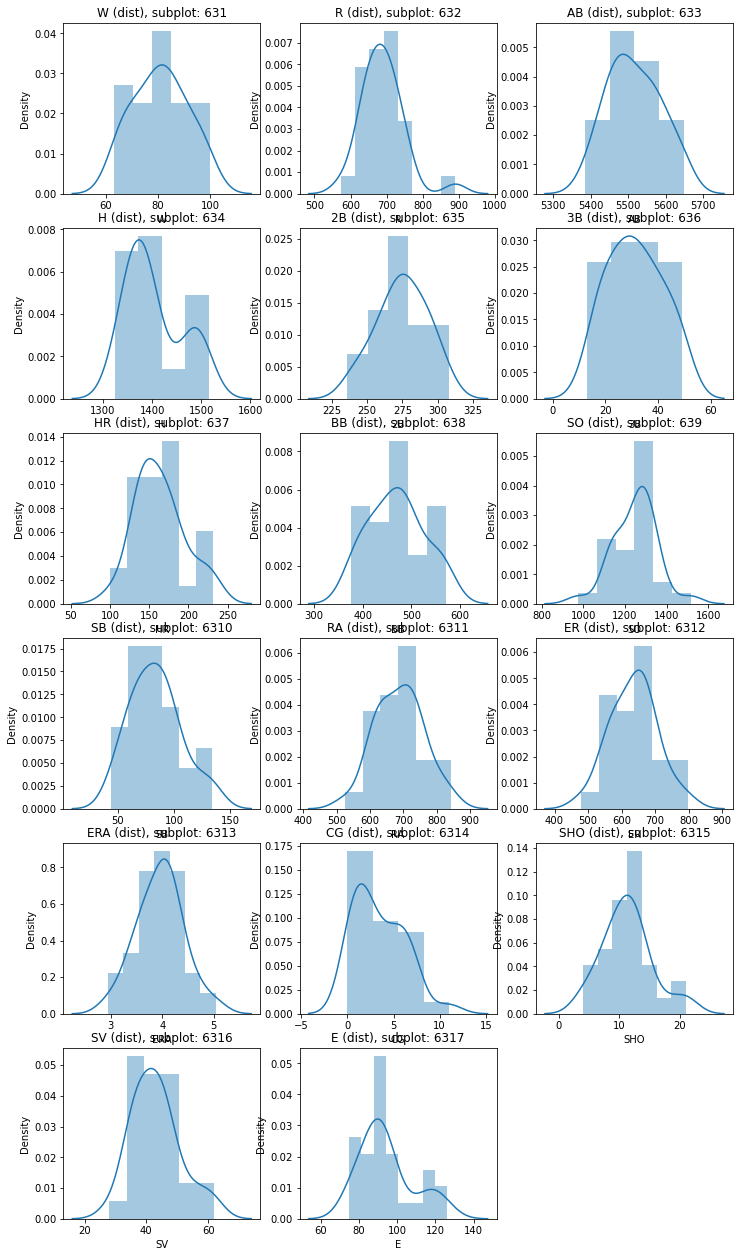

In [11]:
#Distplot for each column
Columns= df.columns

#  plot Numerical Data
a = 6  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(12,22))

for i in Columns:
    plt.subplot(a, b, c)
    plt.title('{} (dist), subplot: {}{}{}'.format(i, a, b, c))
    plt.xlabel(i)
    sns.distplot(df[i])
    c = c + 1

plt.show()

None of the graphs are perfectly bell shaped and seems to have some sort of skewness in them

Bivariate Analysis

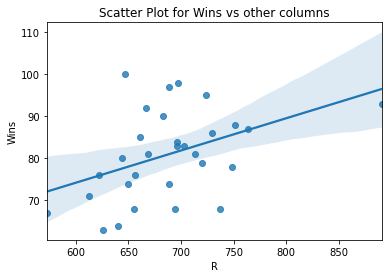

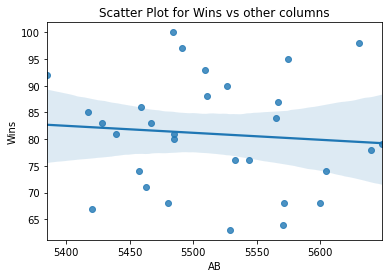

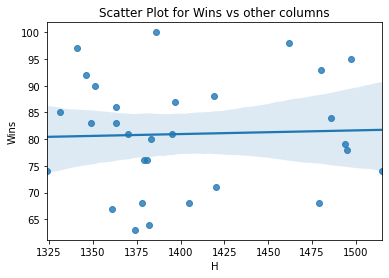

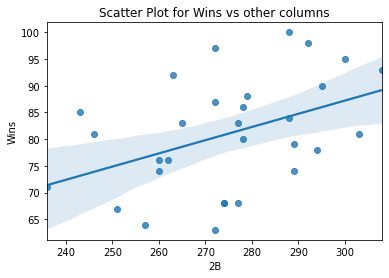

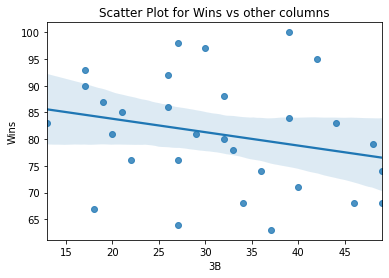

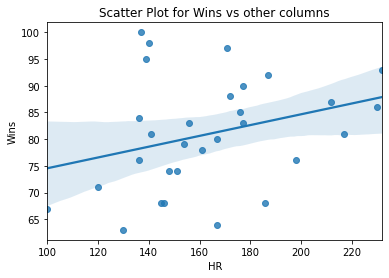

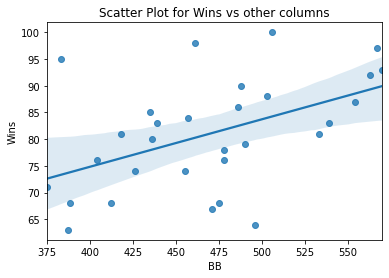

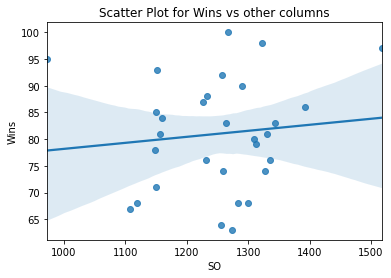

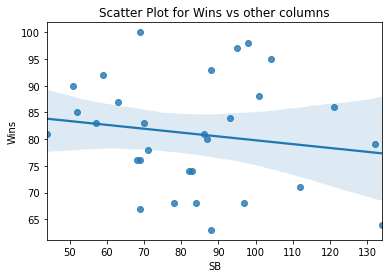

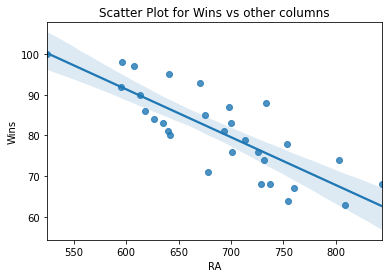

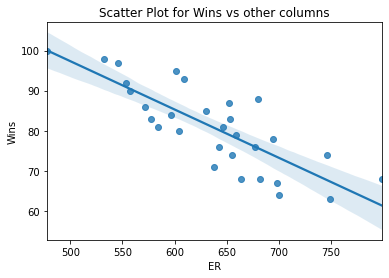

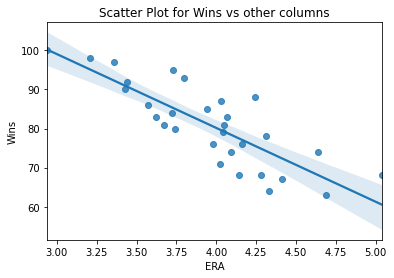

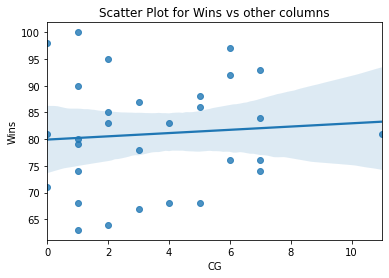

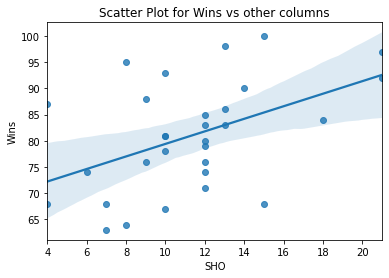

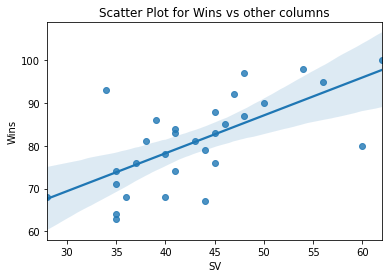

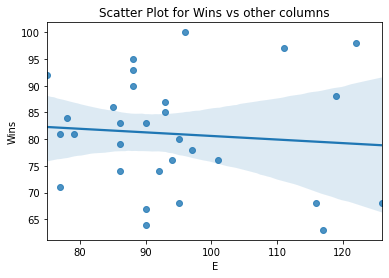

In [12]:
#Checking how W is variated with all columns separately
for i in df.columns[1:]:                                         
    plt.figure(figsize = (6, 4))
    sns.regplot(df[i], df['W'])
    plt.title('Scatter Plot for Wins vs other columns')
    plt.xlabel(i)
    plt.ylabel('Wins')
    plt.show()

Multi Variate Analysis

<function matplotlib.pyplot.show(close=None, block=None)>

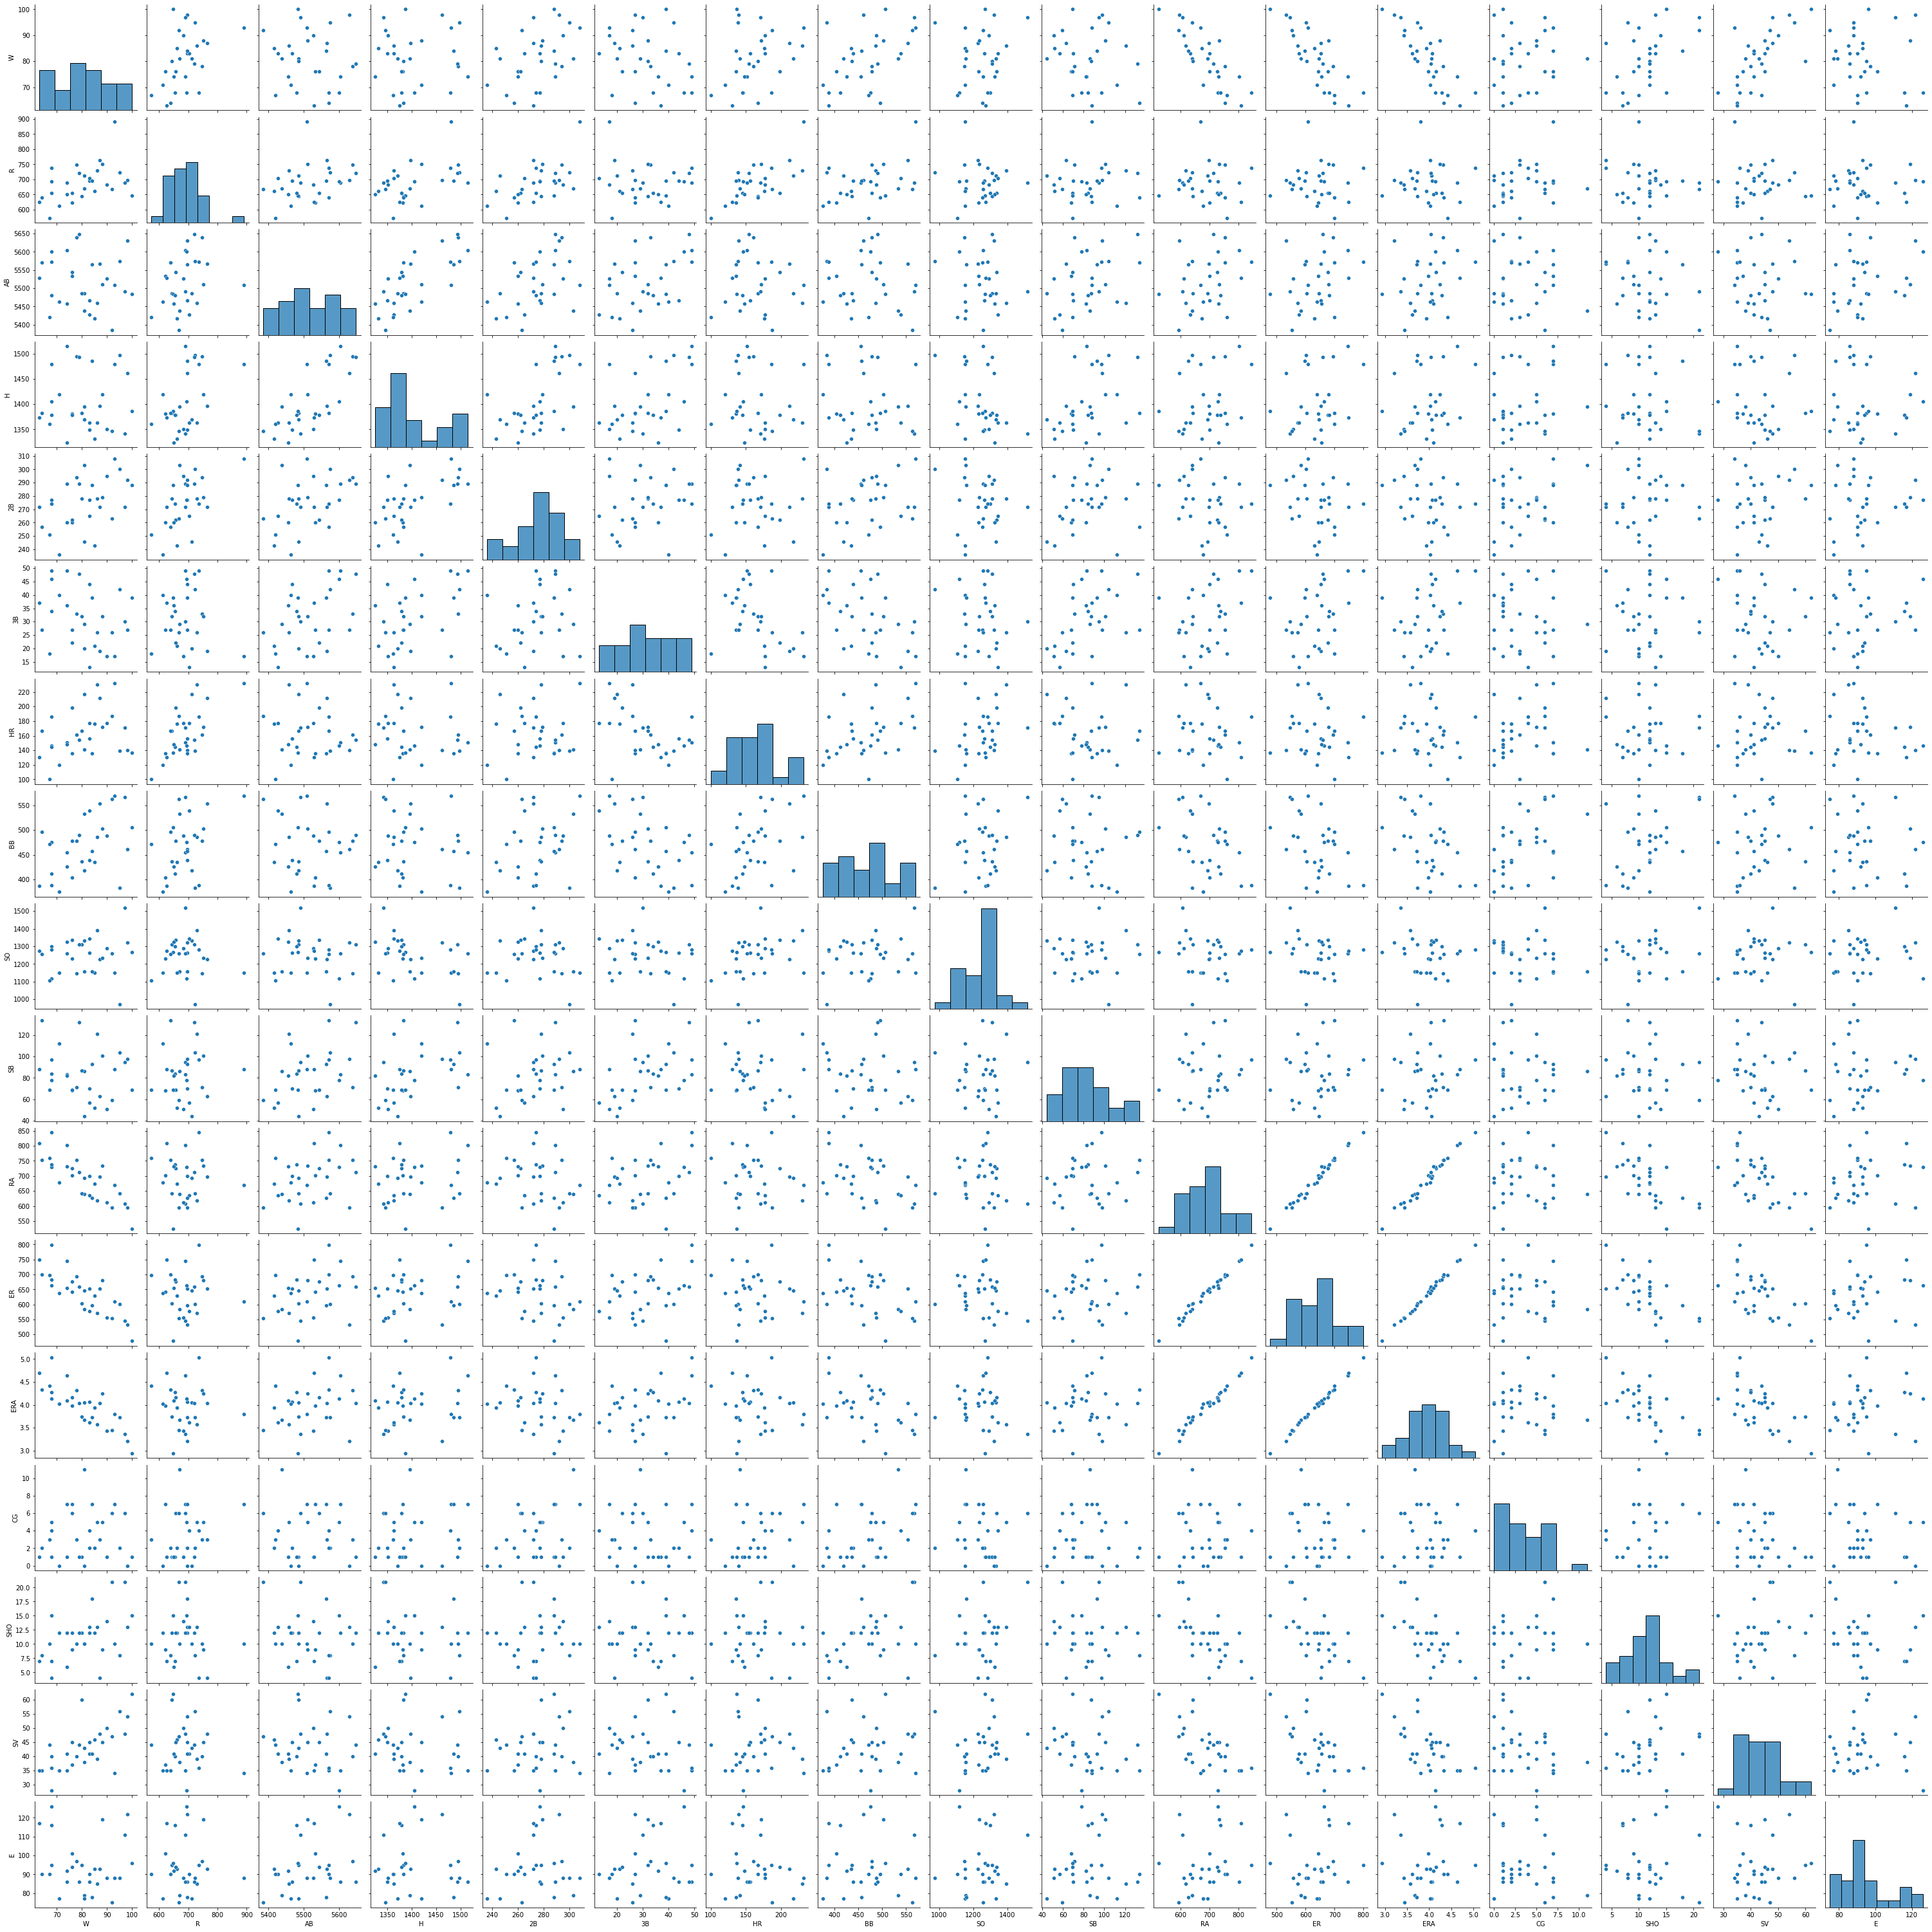

In [13]:
#Checking normal distribution of each column
sns.pairplot(df) 
plt.show

Checking Correlation

In [14]:
df.corr()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
R,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
AB,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
H,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
2B,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
3B,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
HR,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
BB,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
SO,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
SB,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


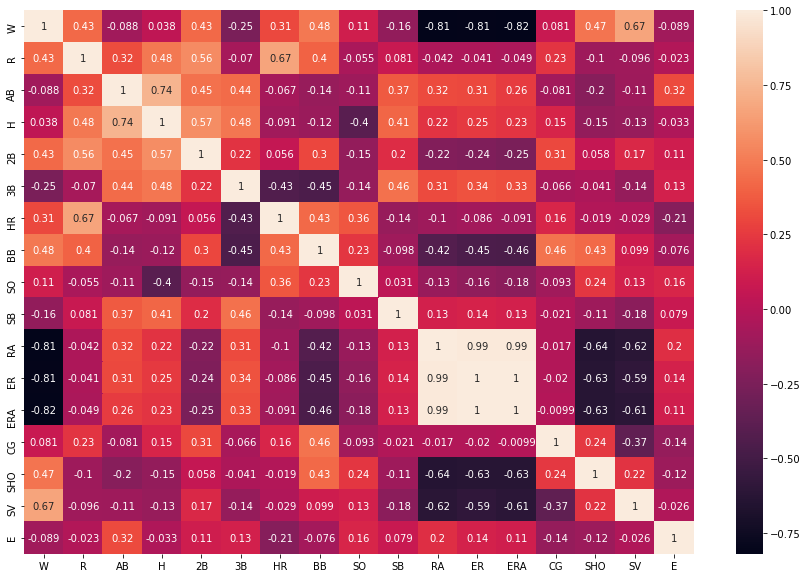

In [15]:
#Heatmap for correlation
plt.figure(figsize=[15,10])
sns.heatmap(df.corr(),annot=True)
plt.show()

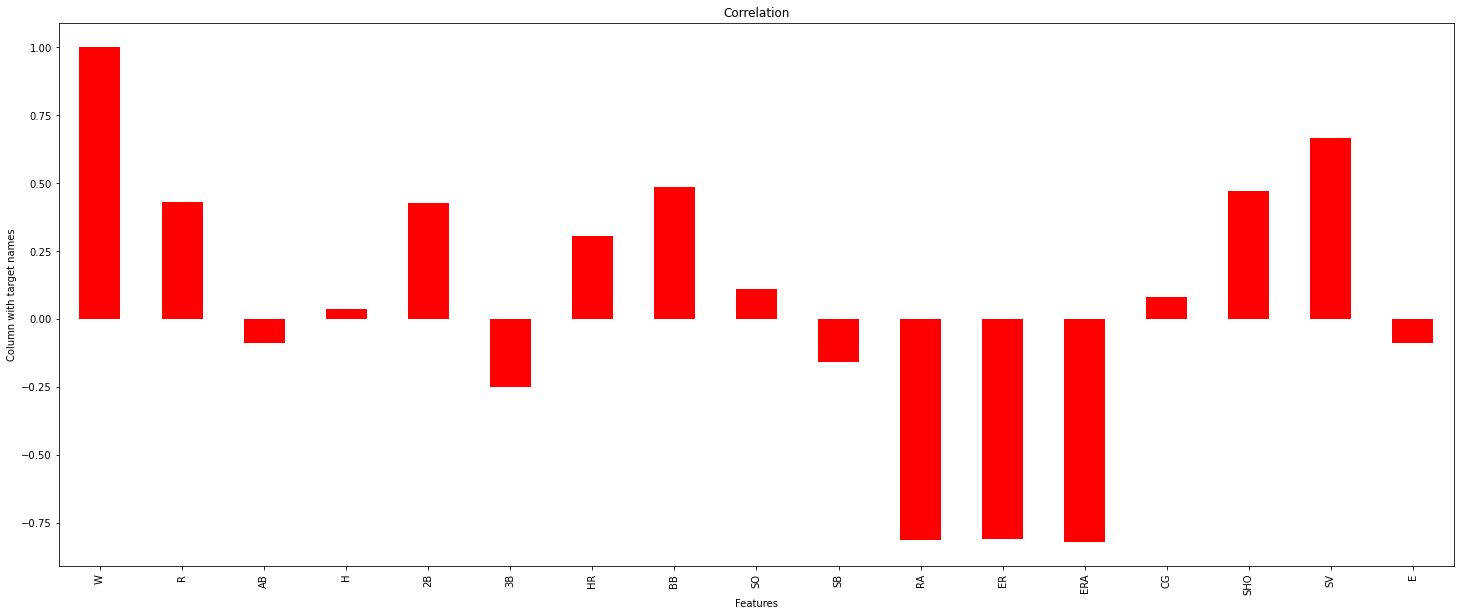

In [16]:
#barplot for correlation
plt.figure(figsize = (25, 10))
df.corr()['W'].plot(kind = 'bar', color = 'r')
plt.xlabel('Features')
plt.ylabel('Column with target names')
plt.title('Correlation')
plt.show()

As we can see from the correlation matrix and the graph, ER, RA, ERA have the strongest correlation with wins but in negative nature.

In positive side SV has the highest correlation of 0.67 followed by BB, SHO, R, 2B all above 0.4.

Checking outliers using Boxplot

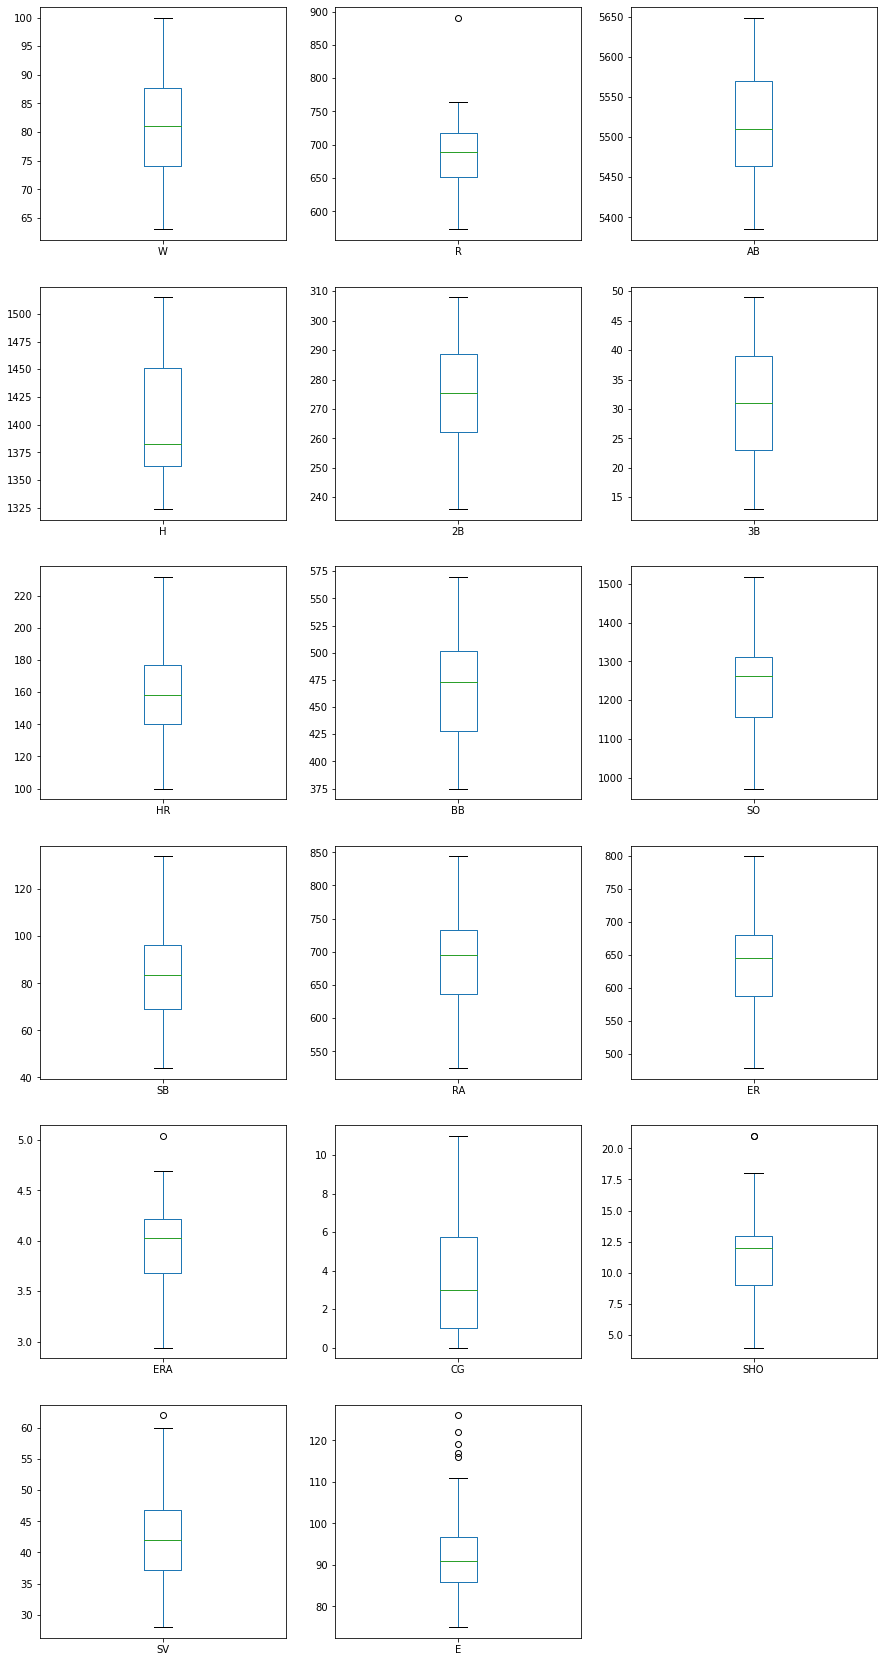

In [17]:
#Plotting bosplot to check the outliers in the datset
df.plot(kind='box',subplots= True,layout=(6,3),figsize=(15,30))
plt.show()

In E there are more outliers and SV, SHO, ERA, R have single outlier. Lets try to remove outliers and check the amount of data is removed.

Removing Outliers

In [18]:
# z score technique
from scipy.stats import zscore
z=np.abs(zscore(df))

In [19]:
df_new=df[(z<3).all(axis=1)]
print(df.shape)
print(df_new.shape)

(30, 17)
(29, 17)


In [20]:
loss_percent=((30-29)/30)*100
loss_percent

3.3333333333333335

Only 3.33% data is removed so we remove the data.

Dealing with Skewness

In [21]:
df.skew()

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

Splitting data into train(x) and test(y)

In [22]:
x = df_new.drop('W', axis = 1)
y = df_new['W']

In [23]:
#removing skewness
from sklearn.preprocessing import power_transform 
#using yeo-johnson method due to presence of negative skewness
x_new = power_transform(x, method='yeo-johnson')        
x_new = pd.DataFrame(x_new, columns = x.columns)

In [24]:
x_new.skew()

R     -0.024842
AB     0.000000
H      0.000000
2B    -0.052793
3B    -0.075139
HR     0.000448
BB    -0.008572
SO     0.051530
SB    -0.009570
RA    -0.011974
ER    -0.004988
ERA   -0.000401
CG    -0.045947
SHO    0.000529
SV    -0.000925
E      0.065585
dtype: float64

Skewness has been removed using power transform

In [26]:
#To Normalize the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = scaler.fit_transform(x_new)

Here the data is normalized between 0 and 1

In [27]:
#checking shape of x and y
print(x.shape)
print(y.shape)

(29, 16)
(29,)


Checking Best Random State¶

In [28]:
maxr2score = 0
maxRS = 0

for i in range (1, 500):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = i)
    LR = LinearRegression()
    LR.fit(x_train, y_train)
    predLR = LR.predict(x_test)
    r2 = r2_score(y_test, predLR)
    if r2>maxr2score:
        maxr2score = r2
        maxRS = i
print ('Max R2 score obtained is', maxr2score, 'on Random State', maxRS)

Max R2 score obtained is 0.9337130346280047 on Random State 476


Max R2 score obtained is 0.933713032764267 on Random State 476

Creating Model

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=476)

In [30]:
models=[LinearRegression(),
        Lasso(), Ridge(),
        ElasticNet(),
        SVR(),
        DecisionTreeRegressor(),
        KNeighborsRegressor(),
        RandomForestRegressor(),
        AdaBoostRegressor(),
        GradientBoostingRegressor(),
      ]
model_names=['LinearRegression',
        'Lasso', 'Ridge',
        'ElasticNet',
        'SVR',
        'DecisionTreeRegressor',
        'KNeighborsRegressor',
        'RandomForestRegressor',
        'AdaBoostRegressor',
        'GradientBoostingRegressor']

r2=[]
mae=[]
mse=[]
rmse=[]
d={}

for i in range(len(models)):
    mod=models[i]
    mod.fit(x_train, y_train)
    pred = mod.predict(x_test)
    r2.append(r2_score(y_test, pred))
    mse.append(mean_squared_error(y_test, pred))
    mae.append(mean_absolute_error(y_test, pred))
    rmse.append(np.sqrt(mean_squared_error(y_test,pred)))
    
    
d={'Model':model_names,'R2_score':r2,
   'mean_absolute_error':mae,
   'mean_squared_error':mse,
   'root_mean_squared_error':rmse}
acc_frame=pd.DataFrame(d)
acc_frame

,Model,R2_score,mean_absolute_error,mean_squared_error,root_mean_squared_error
0,LinearRegression,0.934032,2.664512,10.042955,3.169062
1,Lasso,0.873203,3.654032,19.303641,4.393591
2,Ridge,0.908490,2.850653,13.931546,3.732499
3,ElasticNet,0.814695,4.239468,28.210875,5.311391
4,SVR,0.082436,10.327251,139.689886,11.819048
5,DecisionTreeRegressor,0.498818,7.900000,76.300000,8.734987
6,KNeighborsRegressor,0.603074,6.500000,60.428000,7.773545
7,RandomForestRegressor,0.576095,6.308000,64.535340,8.033389
8,AdaBoostRegressor,0.560987,6.908095,66.835304,8.175286
9,GradientBoostingRegressor,0.658171,6.149084,52.040046,7.213879


Linear regression have bext r2_score and less errors compare to remaining models. But we check Cross_validation_score for best Model.

Checking Cross Validation

In [31]:
from sklearn.model_selection import cross_val_score
cross=[]
for model in range(len(models)):
    scr=cross_val_score(models[model],x,y,cv=5)
    cross.append(scr.mean())   
difference={'Model':model_names,'R2_score':r2,"Cross_val_score":cross}
acc_frame=pd.DataFrame(difference)
acc_frame

,Model,R2_score,Cross_val_score
0,LinearRegression,0.934032,0.376132
1,Lasso,0.873203,0.510069
2,Ridge,0.908490,0.466468
3,ElasticNet,0.814695,0.408247
4,SVR,0.082436,-0.293530
5,DecisionTreeRegressor,0.498818,-2.395757
6,KNeighborsRegressor,0.603074,0.118202
7,RandomForestRegressor,0.576095,-0.483042
8,AdaBoostRegressor,0.560987,-0.676123
9,GradientBoostingRegressor,0.658171,-1.371795


As Linear regression have bext r2_score and less errors compare to remaining models. But difference of R2_score and Cross_validation_score for LassoRegressor is less and errors also less compared to other model except LinearRegression. So we consider Lasso as our best model and performing the hyper Tunning.

Hypertuning 

In [32]:
from sklearn.model_selection import GridSearchCV

#creating parameter list to pass in GridSearchCV
parameters= {
    'alpha':[.00001, 0.0001,0.001, 0.01],
    'fit_intercept':[True,False],
    'normalize':[True,False],
    'positive':[True,False],
    'selection':['cyclic','random'],
    }

In [33]:
GCV= GridSearchCV(Lasso(),parameters, cv = 5)  #Tuning LASSO
GCV.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01],
                         'fit_intercept': [True, False],
                         'normalize': [True, False], 'positive': [True, False],
                         'selection': ['cyclic', 'random']})

In [34]:
model = Lasso(alpha=0.001,fit_intercept= True, normalize = True, positive= False, selection = 'cyclic')
model.fit(x_train, y_train)
pred = model.predict(x_test)
print (r2_score(y_test, pred))
print (mean_squared_error(y_test, pred))
print (mean_absolute_error(y_test, pred))

0.9344048767849558
9.986201558258326
2.562370188947681


After hypertuning with GridSearchCV the R2 score and cross validation score of our Lasso increased.

Ploting the final Graph for Actual and Predicted output values

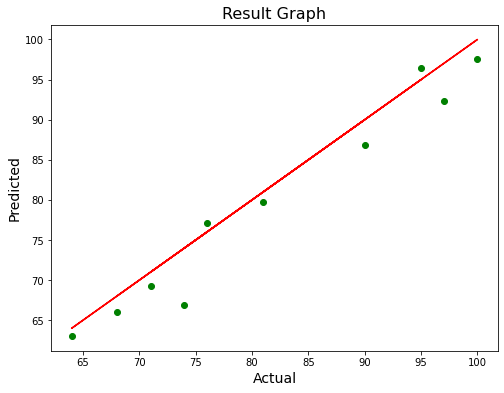

In [35]:
# Final output Graph
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred,color="g")
plt.plot(y_test,y_test,color="r")
plt.xlabel('Actual',fontsize=14)
plt.ylabel('Predicted',fontsize=14)
plt.title("Result Graph",fontsize=16)
plt.show()

Model Saving

In [36]:
import pickle, joblib
filename = 'Baseball.pkl'
pickle.dump(model, open(filename, 'wb'))

Result

Loading the Model

In [37]:
lasso=joblib.load('Baseball.pkl')
Predicted = lasso.predict(x_test)
Predicted

array([66.08041535, 77.07792501, 69.25617703, 86.81453162, 66.92987622,
       96.39632973, 63.0450966 , 97.57651261, 92.34446905, 79.80347439])

In [38]:
Final=np.array(y_test)
Final

array([ 68,  76,  71,  90,  74,  95,  64, 100,  97,  81], dtype=int64)

In [39]:
predict=np.array(lasso.predict(x_test))
predict

array([66.08041535, 77.07792501, 69.25617703, 86.81453162, 66.92987622,
       96.39632973, 63.0450966 , 97.57651261, 92.34446905, 79.80347439])

In [40]:
df_pred=pd.DataFrame({"original":Final,"predicted":predict},index=range(len(Final)))
df_pred

,original,predicted
0,68,66.080415
1,76,77.077925
2,71,69.256177
3,90,86.814532
4,74,66.929876
5,95,96.396330
6,64,63.045097
7,100,97.576513
8,97,92.344469
9,81,79.803474


We have used Lasso in this dataset and achieve the accuracy score.It is also used for predicting the number of wins for a baseball team.